In [99]:
pip install tensorflow_decision_forests 

Note: you may need to restart the kernel to use updated packages.


In [100]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [101]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [102]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [103]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [104]:
dataset_df = dataset_df.drop('Id', axis=1)

In [105]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [106]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_43492/318364108.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);
/tmp/ipykernel_43492/318364108.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, h

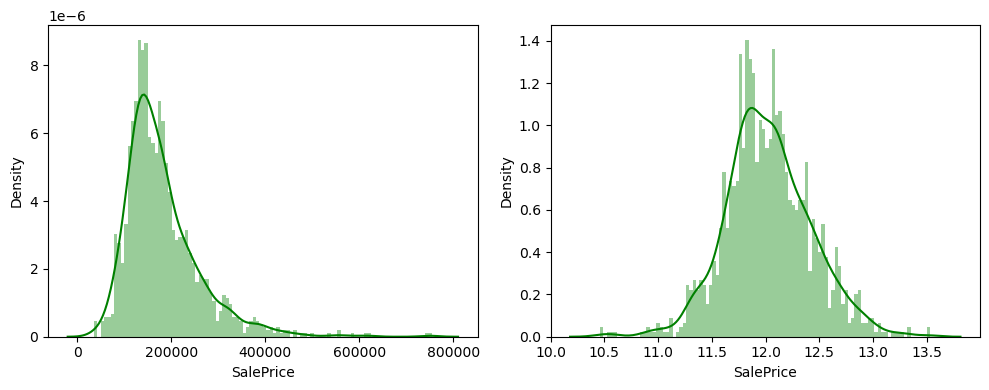

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);

dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log1p(x))

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[1])

plt.tight_layout()
plt.show()



### Change the type of the variable to the right one:

In [108]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [109]:
list(set(dataset_df.dtypes.tolist()))


[dtype('float64'), dtype('O'), dtype('int64')]

### Create the data set of only numerical columns:

In [110]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247699
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109016
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317171
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849405
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429220


### Check how many NaN in the numerical columns:

In [111]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Check the correlation between each variable VS SalePrice:

<Axes: >

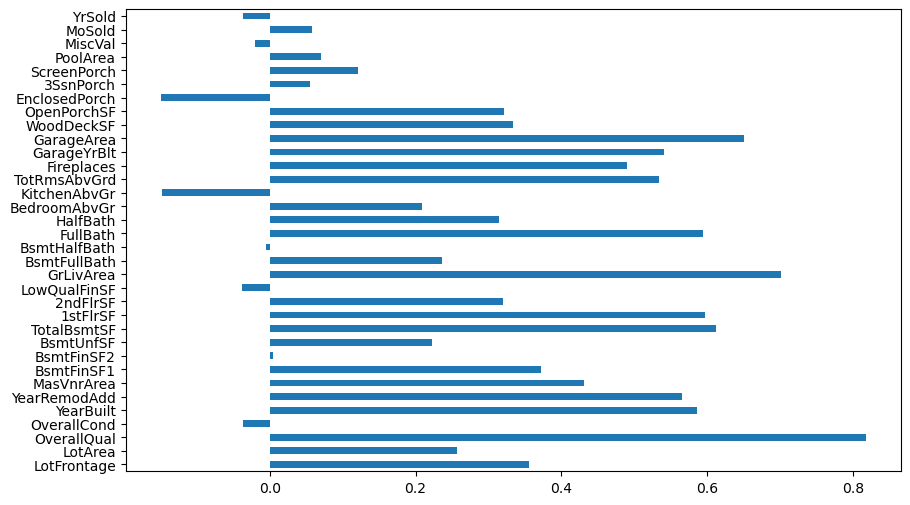

In [112]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

### View the distribution of each numerical variable:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

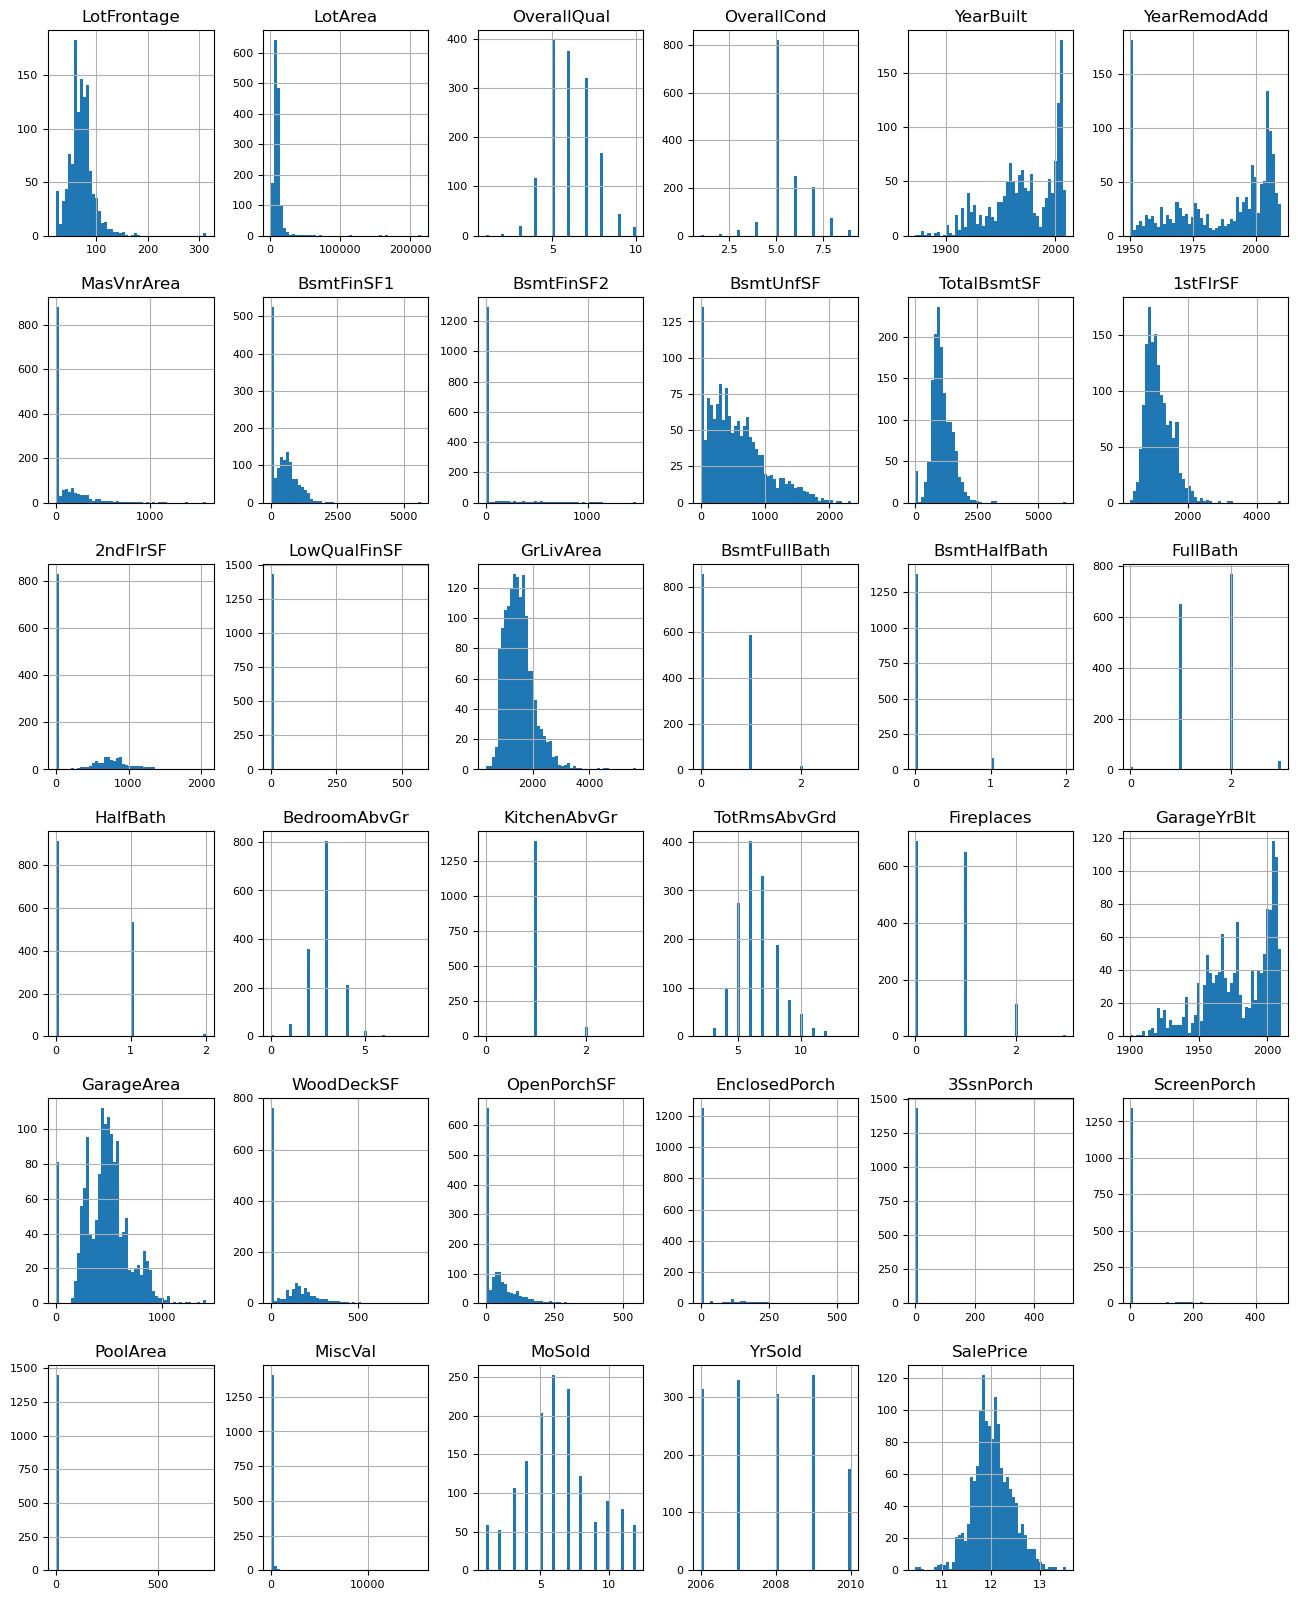

In [113]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


### Check how many NaN values in the complete dataset:

In [114]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

NaN values remaining: 7829
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [115]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1012,70,RL,55.0,10592,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.013707
1034,30,RL,50.0,6305,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,11.693170
1371,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,12.016733
264,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,11.198228
713,190,RL,60.0,9873,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,11.767575
476,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,12.249616
189,120,RL,41.0,4923,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,12.563751
747,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,12.491176
1084,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,12.141539
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,12.375820


### Create new better columns GarageAgeAtSale and HouseAgeAtSale and remove old one:

In [116]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

### Create new better columns BsmtBath and Bath and remove old ones:

In [117]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

### Change columns categorical into ordinal:

In [118]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_43492/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [119]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_43492/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_43492/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_43492/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [120]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_43492/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_43492/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_43492/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

### Remove not important columns (related to inspector.variable_importances):

In [121]:
dataset_df = dataset_df.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

In [122]:
dataset_df = dataset_df.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

In [123]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Utilities        1460 non-null   object 
 6   Neighborhood     1460 non-null   object 
 7   OverallQual      1460 non-null   int64  
 8   OverallCond      1460 non-null   int64  
 9   YearBuilt        1460 non-null   int64  
 10  YearRemodAdd     1460 non-null   int64  
 11  Exterior1st      1460 non-null   object 
 12  Exterior2nd      1460 non-null   object 
 13  MasVnrArea       1452 non-null   float64
 14  ExterQual        1460 non-null   object 
 15  BsmtQual         1423 non-null   float64
 16  BsmtCond         1423 non-null   float64
 17  BsmtExposure  

In [124]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,...,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,SalePrice,HouseAgeAtSale,GarageAgeAtSale,BsmtBath,Bath
1432,30,RL,60.0,10800,Pave,AllPub,OldTown,4,6,1927,...,0,NaN,NaN,0,8,11.074436,80.0,79.0,0.0,2.0
588,20,RL,65.0,25095,Pave,AllPub,ClearCr,5,8,1968,...,0,NaN,NaN,0,6,11.870607,41.0,41.0,2.0,1.0
1409,60,RL,46.0,20544,Pave,AllPub,NWAmes,7,6,1986,...,0,NaN,NaN,0,11,12.278398,22.0,22.0,0.0,2.5
1306,120,RL,48.0,6955,Pave,AllPub,NridgHt,7,5,2005,...,0,NaN,NaN,0,9,12.218500,1.0,1.0,0.0,2.0
628,60,RL,70.0,11606,Pave,AllPub,NAmes,5,5,1969,...,0,NaN,NaN,0,9,11.813037,38.0,38.0,0.5,2.0
1188,60,RL,68.0,8935,Pave,AllPub,CollgCr,7,5,2002,...,0,NaN,NaN,0,7,12.180760,7.0,7.0,0.0,2.5
417,70,RL,86.0,22420,Pave,AllPub,Crawfor,6,6,1918,...,0,NaN,NaN,0,11,12.384223,89.0,89.0,1.0,2.5
1325,30,RM,40.0,3636,Pave,AllPub,IDOTRR,4,4,1922,...,0,NaN,NaN,0,1,10.915107,86.0,NaN,0.0,1.0
137,90,RL,82.0,11070,Pave,AllPub,Mitchel,7,5,1988,...,0,NaN,NaN,0,7,12.049425,18.0,17.0,0.0,3.0
504,160,RL,24.0,2308,Pave,AllPub,NPkVill,6,5,1974,...,0,NaN,NaN,0,6,11.898195,35.0,35.0,0.5,2.5


In [125]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 3680


### In categorical columns, put all rare categories into one unique category "Other":

In [126]:
threshold = dataset_df.shape[0] * 0.005  # nombre minimum d'occurrences pour ne pas être rare

# Boucle sur toutes les colonnes de type object (catégorielles)
for col in dataset_df.select_dtypes(include=['object']).columns:
    counts = dataset_df[col].value_counts()
    rare_cats = counts[counts < threshold].index
    dataset_df[col] = dataset_df[col].replace(rare_cats, "Other")


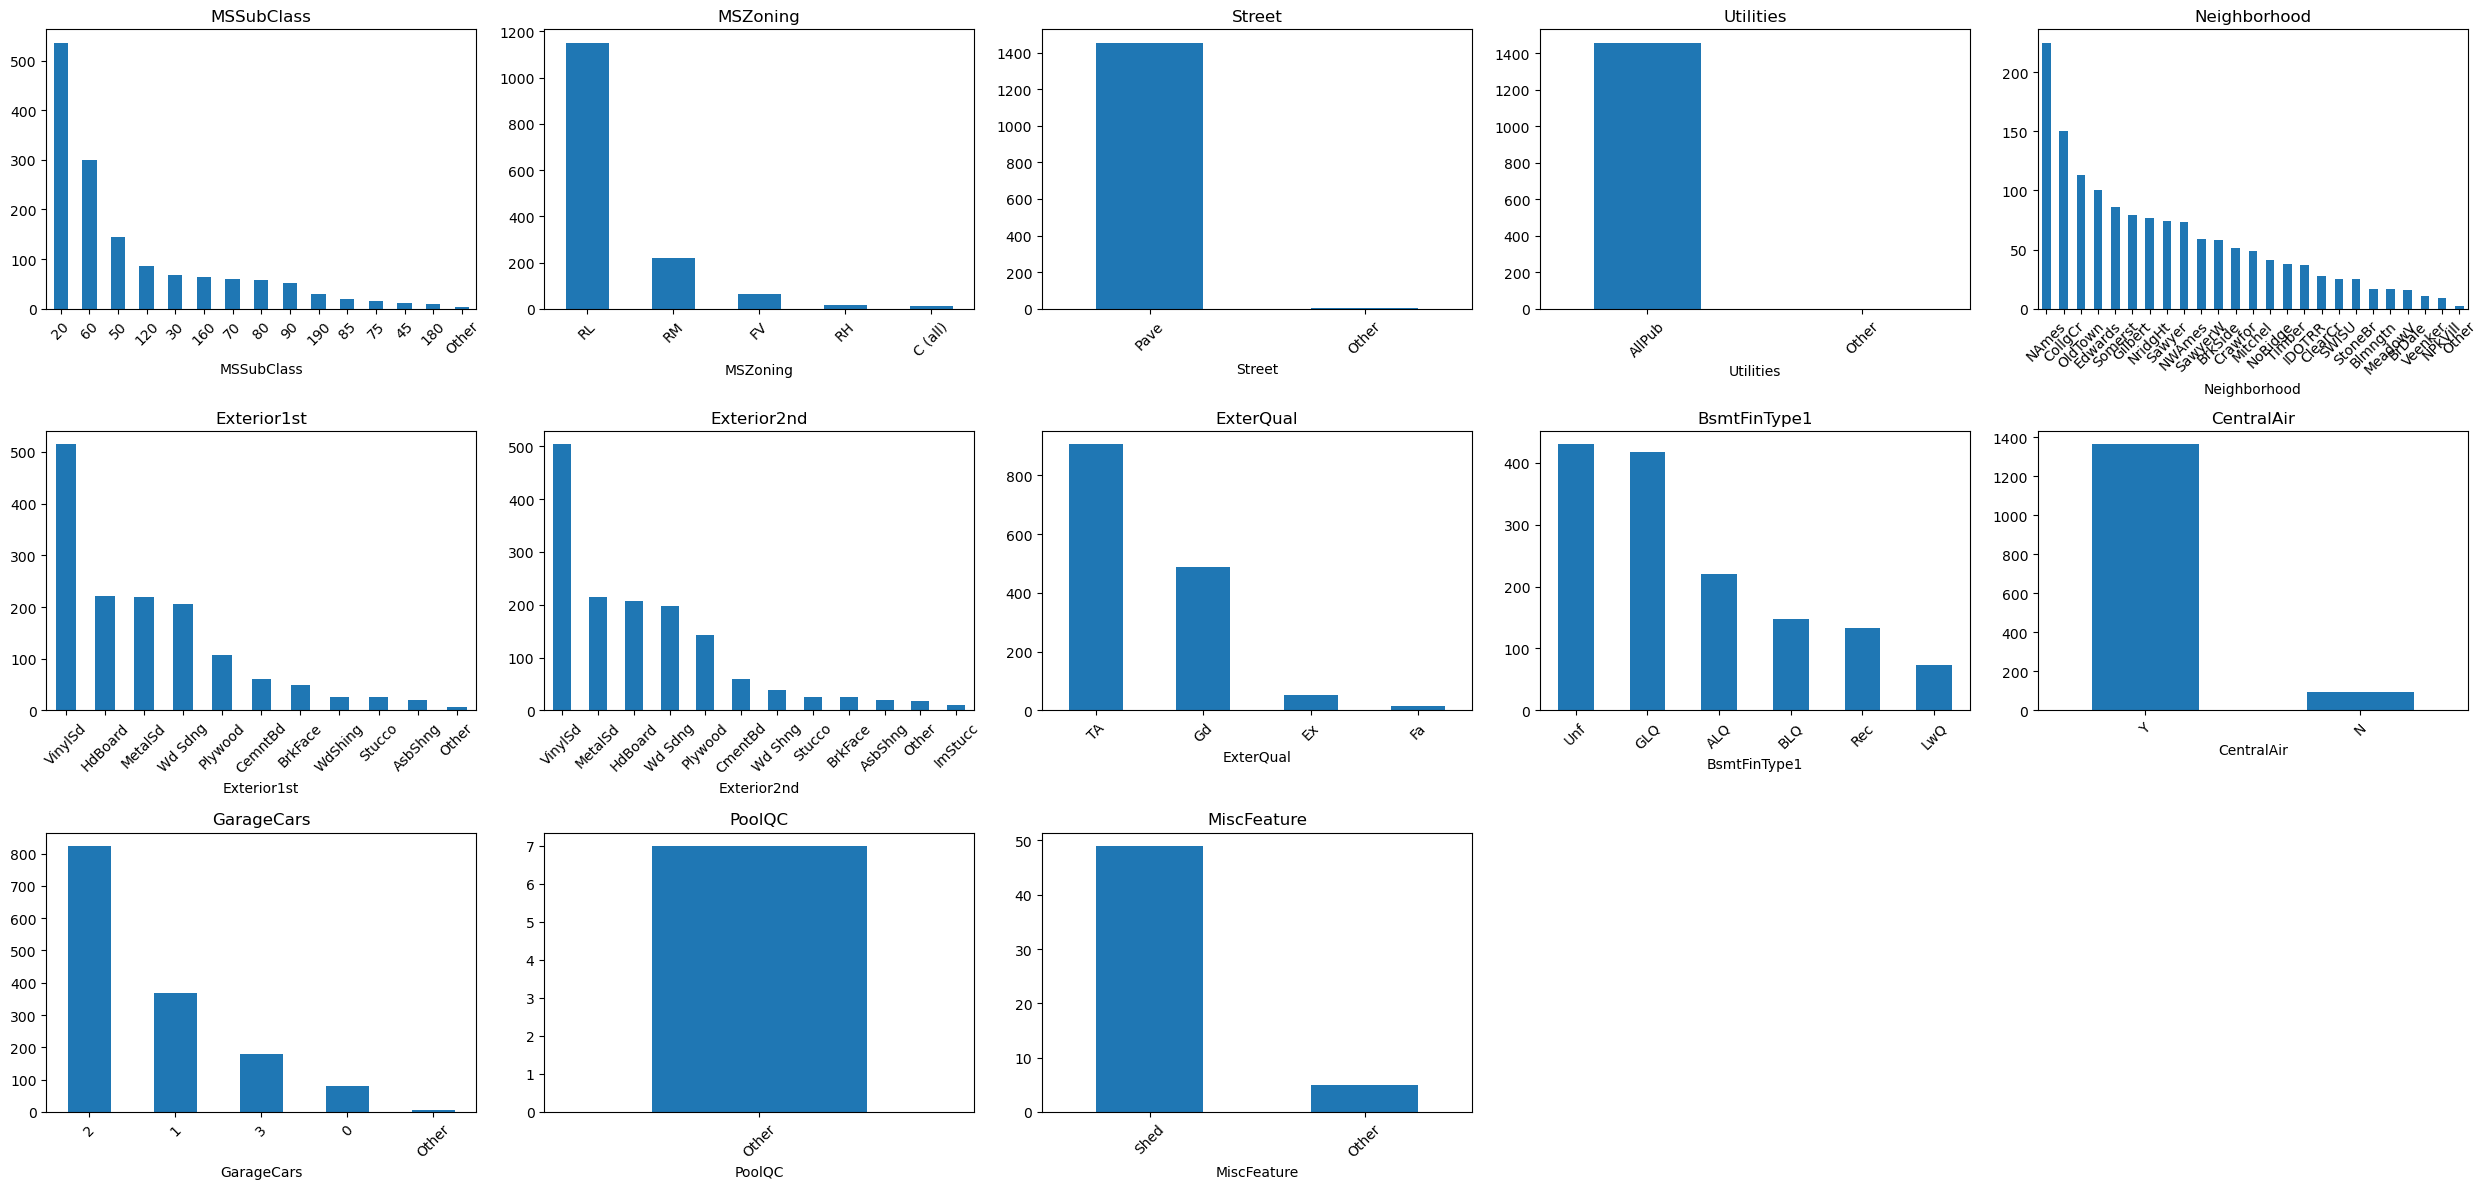

In [127]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


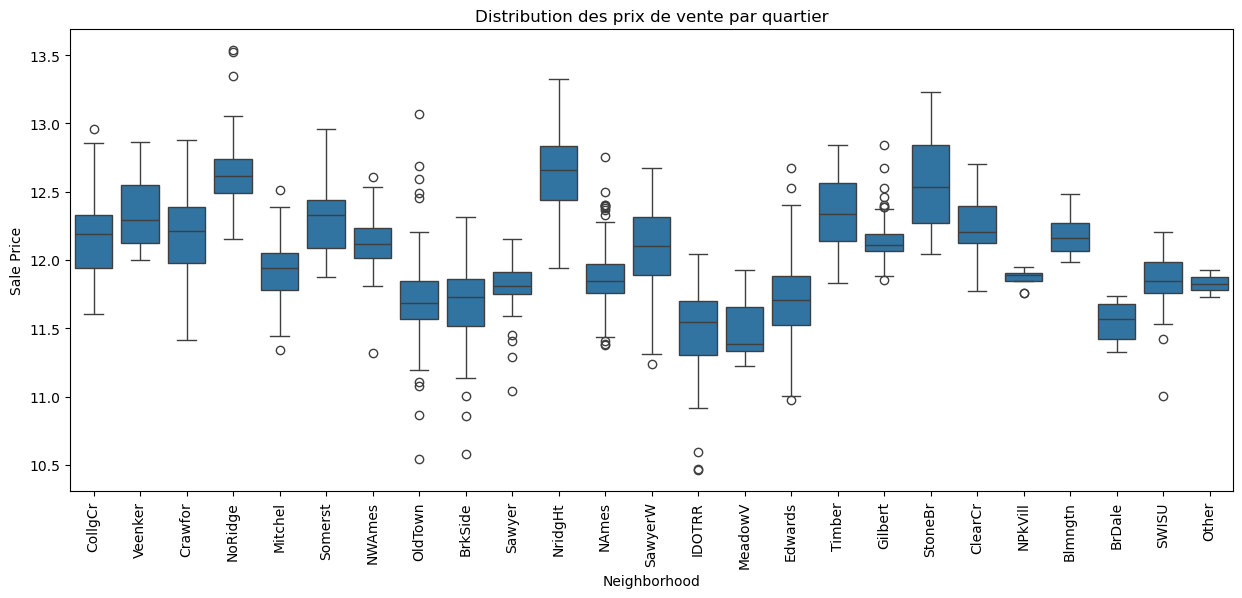

In [128]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=dataset_df)
plt.xticks(rotation=90)
plt.title("Distribution des prix de vente par quartier")
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
plt.show()

### Prepare full training data set:

In [129]:
from sklearn.model_selection import GroupKFold, KFold, GroupShuffleSplit, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error
import tensorflow_decision_forests as tfdf
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


# Paramètres
n_splits = 5
label = "SalePrice"

dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)
groups = dataset_df["Neighborhood"] 

# Séparer la target
y = dataset_df['SalePrice']
y_binned = pd.qcut(dataset_df["SalePrice"], q=20, labels=False, duplicates="drop")
X = dataset_df.drop(columns=['SalePrice'])

# Sélection des colonnes catégorielles
X_xgb = X.copy()
categorical_cols = X_xgb.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X_xgb[col] = le.fit_transform(X_xgb[col].astype(str))
# X_rand = dataset_df_rand.drop(columns=["SalePrice"], axis=1)
# y_rand = dataset_df_rand["SalePrice"]

### Prepare test data set:

In [130]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

test_data = test_data.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

test_data = test_data.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

X_test = test_data
# Sélection des colonnes catégorielles
X_xgb_test = X_test.copy()
categorical_cols = X_xgb_test.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X_xgb_test[col] = le.fit_transform(X_xgb_test[col].astype(str))
    
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    X_test,
    task = tfdf.keras.Task.REGRESSION)

/tmp/ipykernel_43492/80725728.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_43492/80725728.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_43492/80725728.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

### Stacking RF and XGBoost: 

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpbot7rrtd as temporary training directory


I0000 00:00:1757026907.841922   43492 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757026907.841984   43492 kernel.cc:783] Collect training examples
I0000 00:00:1757026907.842001   43492 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757026907.842143   43492 kernel.cc:401] Number of batches: 2
I0000 00:00:1757026907.842150   43492 kernel.cc:402] Number of examples: 1157
I0000 00:00:1757026907.842944   43492 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MSSubClass (14 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757026907.843017   43492 data_spec_inference.cc:354] 1 item(s) have been p

2/2 [==============================] - 0s 32ms/step
Nombre d'échantillons train : 1157
Nombre d'échantillons test  : 303
Fold 1 → RANDOM FOREST RMSE: 50964.77 | XGBoost RMSE: 44575.94
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp6ksvnn2l as temporary training directory


I0000 00:00:1757026913.101578   43492 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757026913.101642   43492 kernel.cc:783] Collect training examples
I0000 00:00:1757026913.101659   43492 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757026913.101811   43492 kernel.cc:401] Number of batches: 2
I0000 00:00:1757026913.101817   43492 kernel.cc:402] Number of examples: 1032
I0000 00:00:1757026913.102459   43492 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Exterior1st (10 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757026913.102516   43492 data_spec_inference.cc:354] 1 item(s) have been 

2/2 [==============================] - 0s 28ms/step
Nombre d'échantillons train : 1032
Nombre d'échantillons test  : 428
Fold 2 → RANDOM FOREST RMSE: 31660.26 | XGBoost RMSE: 32607.13
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpe1w4021z as temporary training directory


I0000 00:00:1757026918.932582   43492 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757026918.932627   43492 kernel.cc:783] Collect training examples
I0000 00:00:1757026918.932637   43492 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757026918.932753   43492 kernel.cc:401] Number of batches: 2
I0000 00:00:1757026918.932759   43492 kernel.cc:402] Number of examples: 1163
I0000 00:00:1757026918.933446   43492 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MSSubClass (14 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757026918.933499   43492 data_spec_inference.cc:354] 1 item(s) have been p

2/2 [==============================] - 0s 30ms/step
Nombre d'échantillons train : 1163
Nombre d'échantillons test  : 297
Fold 3 → RANDOM FOREST RMSE: 44072.91 | XGBoost RMSE: 46908.95
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpnk37rjg0 as temporary training directory


I0000 00:00:1757026925.032068   43492 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757026925.032126   43492 kernel.cc:783] Collect training examples
I0000 00:00:1757026925.032146   43492 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757026925.032351   43492 kernel.cc:401] Number of batches: 2
I0000 00:00:1757026925.032378   43492 kernel.cc:402] Number of examples: 1425
I0000 00:00:1757026925.033276   43492 data_spec_inference.cc:354] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MSSubClass (13 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757026925.033373   43492 data_spec_inference.cc:354] 1 item(s) have been p

2/2 [==============================] - 0s 29ms/step
Nombre d'échantillons train : 1425
Nombre d'échantillons test  : 35
Fold 4 → RANDOM FOREST RMSE: 25720.11 | XGBoost RMSE: 18894.75
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpubw0769m as temporary training directory


I0000 00:00:1757026934.547905   43492 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757026934.547988   43492 kernel.cc:783] Collect training examples
I0000 00:00:1757026934.548006   43492 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757026934.548146   43492 kernel.cc:401] Number of batches: 2
I0000 00:00:1757026934.548153   43492 kernel.cc:402] Number of examples: 1063
I0000 00:00:1757026934.548863   43492 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757026934.548922   43492 data_spec_inference.cc:354] 1 item(s) have been pr

2/2 [==============================] - 0s 29ms/step
Nombre d'échantillons train : 1063
Nombre d'échantillons test  : 397
Fold 5 → RANDOM FOREST RMSE: 25378.26 | XGBoost RMSE: 26142.47


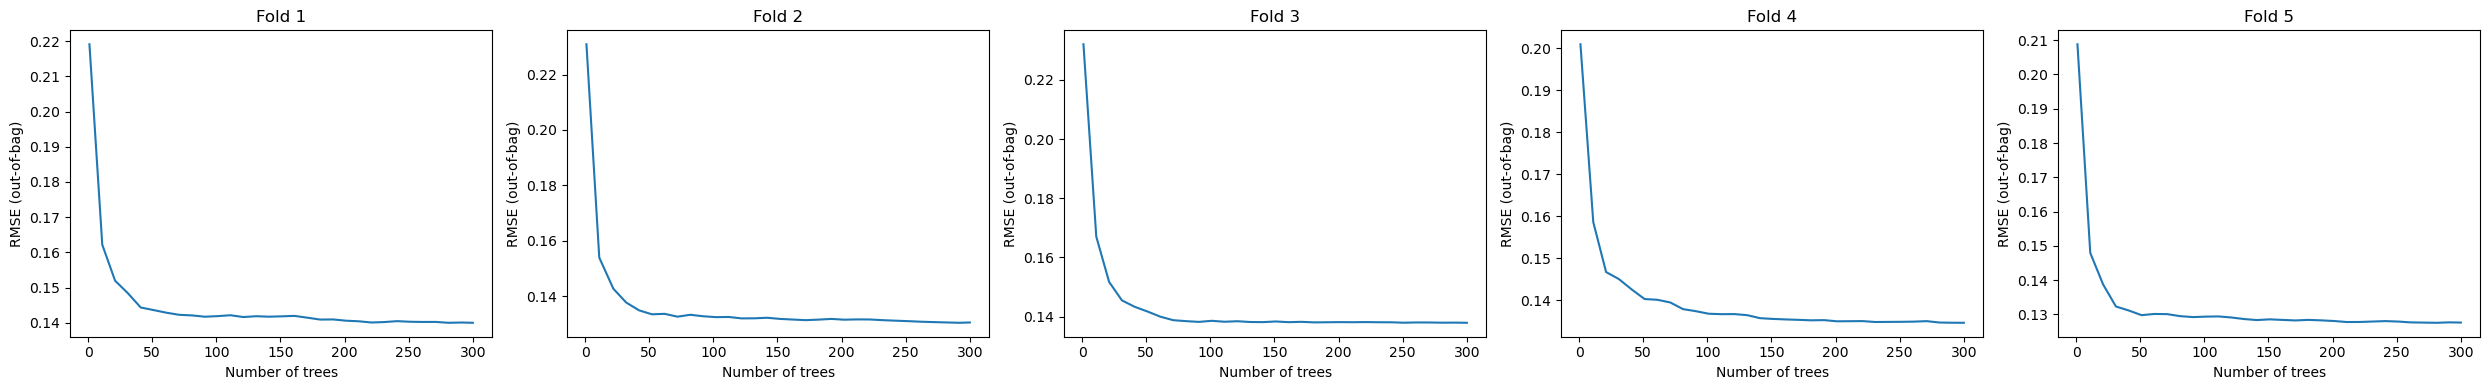

RMSE moyen sur 5 folds: 34692.55


In [133]:
# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

# Initialiser KFold
# gss = GroupShuffleSplit(n_splits=n_splits, test_size=0.3)
# gkf = GroupKFold(n_splits=5)
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

stack_train = np.zeros((X.shape[0], 2)) 
stack_test = np.zeros((X_test.shape[0], 2))

rmse_scores = []

for i, (train_idx, valid_idx) in enumerate(sgkf.split(X, y_binned, groups=groups)):
    # X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]

    # --- Random Forest TF-DF ---
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        dataset_df.iloc[train_idx], label=label, task=tfdf.keras.Task.REGRESSION
    )
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        dataset_df.iloc[valid_idx], label=label, task=tfdf.keras.Task.REGRESSION
    )

    rf_model = tfdf.keras.RandomForestModel(
        hyperparameter_template="benchmark_rank1",    # num_trees ≈ 300 (plutôt modéré, pour éviter d’être trop lent).
                                                        # max_depth non limité (ou très grand, ex. 16+), donc les arbres poussent assez profond.
                                                        # min_examples ≈ 1 → feuilles très fines possibles (propension à l’overfit si les données sont bruitées).
                                                        # sampling_ratio ≈ 1.0 → chaque arbre voit ~100% des données (moins de bagging).
                                                        # num_candidate_attributes_ratio ≈ 1.0 → chaque split peut utiliser toutes les features disponibles.
                                                        # bootstrap = True.
        task=tfdf.keras.Task.REGRESSION,
        random_seed=42
    )

    # model = tfdf.keras.RandomForestModel(
    #         task=tfdf.keras.Task.REGRESSION,
    #         num_trees=500,                # Assez d’arbres pour la stabilité
    #         max_depth=12,                 # Empêche les arbres trop complexes
    #         min_examples=5,               # Pas de splits sur peu de données
    #         bootstrap_training_dataset=True,  # Ajoute de la diversité
    #         honest=True,                  # Honest estimation
    #         categorical_algorithm="RANDOM",  # Catégorielles plus robustes
    #         random_seed=42
    #     )
    
    # model = tfdf.keras.RandomForestModel(
    #         task=tfdf.keras.Task.REGRESSION,
    #         num_trees=500,                # Assez d’arbres pour la stabilité
    #         max_depth=12,                 # Empêche les arbres trop complexes
    #         min_examples=5,               # Pas de splits sur peu de données
    #         num_candidate_attributes_ratio = 0.8,  # chaque arbre voit 80% des features
    #         # honest=True,                  # Honest estimation
    #         # categorical_algorithm="RANDOM",  # Catégorielles plus robustes
    #         random_seed=42
    #     )

    rf_model.fit(train_ds, verbose=0)
    stack_train[valid_idx, 0] = rf_model.predict(valid_ds).squeeze()
    stack_test[:, 0] += rf_model.predict(test_ds).squeeze() / n_splits

    # --- XGBoost ---
    X_xgb_train, X_xgb_valid = X_xgb.iloc[train_idx], X_xgb.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=50)
    xgb_model.fit(X_xgb_train, y_train, eval_set=[(X_xgb_valid, y_valid)], verbose=False)
    stack_train[valid_idx, 1] = xgb_model.predict(X_xgb_valid)
    stack_test[:, 1] += xgb_model.predict(X_xgb_test) / n_splits

    rf_valid_pred = np.expm1(stack_train[valid_idx, 0])              # retour à l’échelle réelle
    rf_valid_target = np.expm1(y_valid)
    rf_valid_rmse = np.sqrt(mean_squared_error(rf_valid_target, rf_valid_pred))
    
    xgb_valid_pred = np.expm1(stack_train[valid_idx, 1])
    xgb_valid_target = np.expm1(y_valid)
    xgb_valid_rmse = np.sqrt(mean_squared_error(xgb_valid_target, xgb_valid_pred))
    
    # print("Quartiers en train :", dataset_df.loc[train_idx, "Neighborhood"].unique())
    # print("Quartiers en test  :", dataset_df.loc[valid_idx, "Neighborhood"].unique())
    print("Nombre d'échantillons train :", len(train_idx))
    print("Nombre d'échantillons test  :", len(valid_idx))
    print(f"Fold {i+1} → RANDOM FOREST RMSE: {rf_valid_rmse:.2f} | XGBoost RMSE: {xgb_valid_rmse:.2f}")
    
    rmse_scores.append((rf_valid_rmse+xgb_valid_rmse)/2)

    # Logs d’entraînement
    logs = rf_model.make_inspector().training_logs()
    axes[i].plot(
        [log.num_trees for log in logs],
        [log.evaluation.rmse for log in logs]
    )
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print(f"RMSE moyen sur {n_splits} folds: {np.mean(rmse_scores):.2f}")

### Meta model learning (Linear regression):

In [135]:
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
meta_model.fit(stack_train, y) 
final_preds = meta_model.predict(stack_test) 

In [136]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [137]:
# tfdf.keras.get_all_models()

In [138]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [139]:
# rf.fit(x=train_ds)

In [140]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [141]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [142]:
# inspector.features()

In [143]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [144]:
inspector = rf_model.make_inspector()
inspector.evaluation()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [145]:
print(inspector.variable_importances()["NUM_AS_ROOT"])


[("OverallQual" (1; #42), 163.0), ("KitchenQual" (1; #29), 39.0), ("ExterQual" (4; #15), 32.0), ("GrLivArea" (1; #26), 30.0), ("HouseAgeAtSale" (1; #27), 29.0), ("Bath" (1; #3), 23.0), ("YearBuilt" (1; #51), 21.0), ("MiscVal" (1; #37), 15.0), ("TotRmsAbvGrd" (1; #47), 15.0), ("1stFlrSF" (1; #0), 11.0), ("LotArea" (1; #30), 11.0), ("TotalBsmtSF" (1; #48), 11.0), ("BsmtQual" (1; #11), 10.0), ("Fireplaces" (1; #18), 10.0), ("GarageCond" (1; #22), 10.0), ("PoolArea" (1; #43), 10.0), ("GarageArea" (1; #20), 9.0), ("LotFrontage" (1; #31), 9.0), ("LowQualFinSF" (1; #32), 9.0), ("BsmtCond" (1; #6), 8.0), ("YearRemodAdd" (1; #52), 7.0), ("BsmtFinSF1" (1; #8), 6.0), ("BsmtFinSF2" (1; #9), 6.0), ("GarageAgeAtSale" (1; #19), 6.0), ("GarageYrBlt" (1; #25), 6.0), ("2ndFlrSF" (1; #1), 5.0), ("3SsnPorch" (1; #2), 5.0), ("GarageQual" (1; #24), 5.0), ("KitchenAbvGr" (1; #28), 5.0), ("ScreenPorch" (1; #45), 5.0), ("EnclosedPorch" (1; #14), 4.0), ("BedroomAbvGr" (1; #4), 3.0), ("GarageFinish" (1; #23), 3.

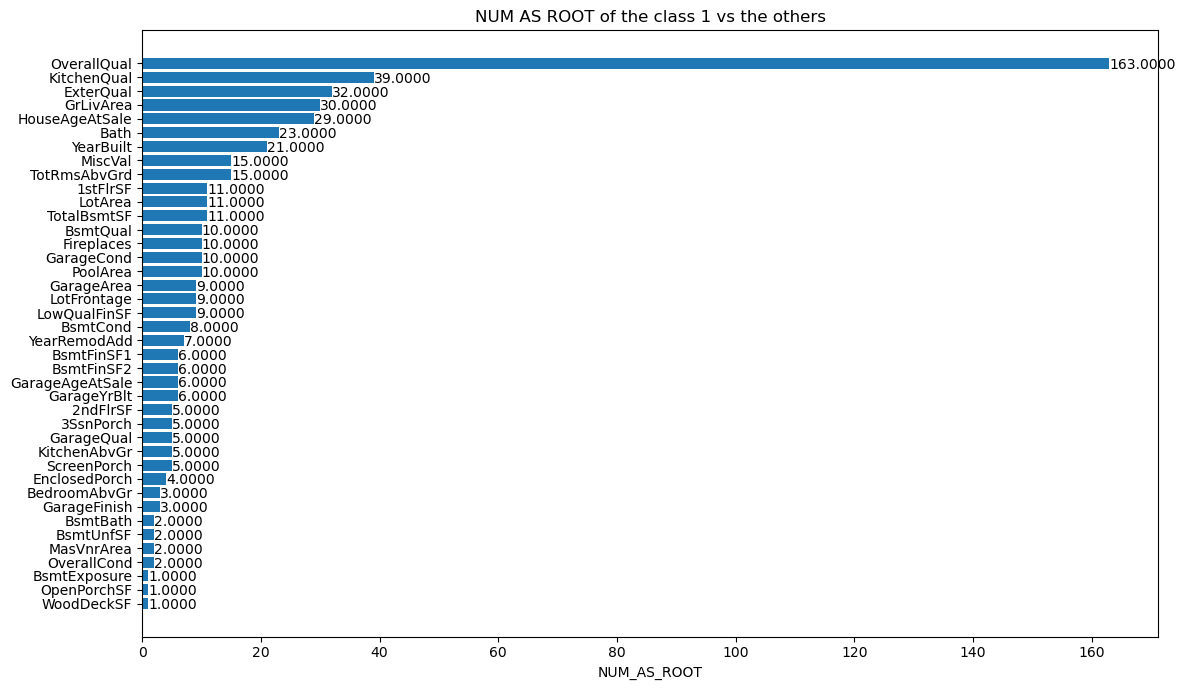

In [146]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [147]:
# Extraire toutes les importances
importances = inspector.variable_importances()

# On va récupérer seulement les 3 types qui nous intéressent
keys = ["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]

# Construire un DataFrame
dfs = []
for key in keys:
    data = []
    # importances[key] est une liste de tuples (feature, importance)
    for feat, imp in importances.get(key, []):
        if isinstance(feat, str):
            data.append((feat, imp))
        else:
            data.append((feat.name, imp))  # Sinon, on extrait son .name
    df = pd.DataFrame(data, columns=["Feature", key])
    dfs.append(df)

# Fusionner les 3 DataFrames
df_importances = dfs[0]
for df in dfs[1:]:
    df_importances = df_importances.merge(df, on="Feature", how="outer").fillna(0)

df_importances.sort_values("NUM_AS_ROOT", ascending=False).tail(10)

,Feature,NUM_AS_ROOT,SUM_SCORE,INV_MEAN_MIN_DEPTH
7,BsmtExposure,1.0,447.779868,0.109890
10,BsmtFinType1,0.0,61.026762,0.103203
16,Exterior1st,0.0,112.822833,0.103953
13,CentralAir,0.0,41.791453,0.102376
17,Exterior2nd,0.0,129.995706,0.104329
21,GarageCars,0.0,814.418679,0.110010
37,MoSold,0.0,294.616396,0.107569
38,Neighborhood,0.0,851.716872,0.118385
34,MSZoning,0.0,25.055270,0.102477
33,MSSubClass,0.0,371.082354,0.110062


In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]] = scaler.fit_transform(
    df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]]
)

# Moyenne des 3 scores (ou pondération si tu veux privilégier un critère)
df_importances["Combined"] = df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]].mean(axis=1)

# Trier par importance combinée
df_importances = df_importances.sort_values("Combined", ascending=False)
df_importances.tail(15)

,Feature,NUM_AS_ROOT,SUM_SCORE,INV_MEAN_MIN_DEPTH,Combined
38,Neighborhood,0.000000,0.044268,0.070439,0.038236
23,GarageFinish,0.018405,0.039370,0.056228,0.038001
5,BsmtBath,0.012270,0.037827,0.055426,0.035174
39,OpenPorchSF,0.006135,0.037914,0.057349,0.033799
12,BsmtUnfSF,0.012270,0.029705,0.042799,0.028258
46,WoodDeckSF,0.006135,0.031087,0.043480,0.026901
21,GarageCars,0.000000,0.042271,0.033590,0.025287
7,BsmtExposure,0.006135,0.022637,0.033061,0.020611
33,MSSubClass,0.000000,0.018530,0.033820,0.017450
37,MoSold,0.000000,0.014435,0.022847,0.012427


In [149]:
# ['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
# 'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC']

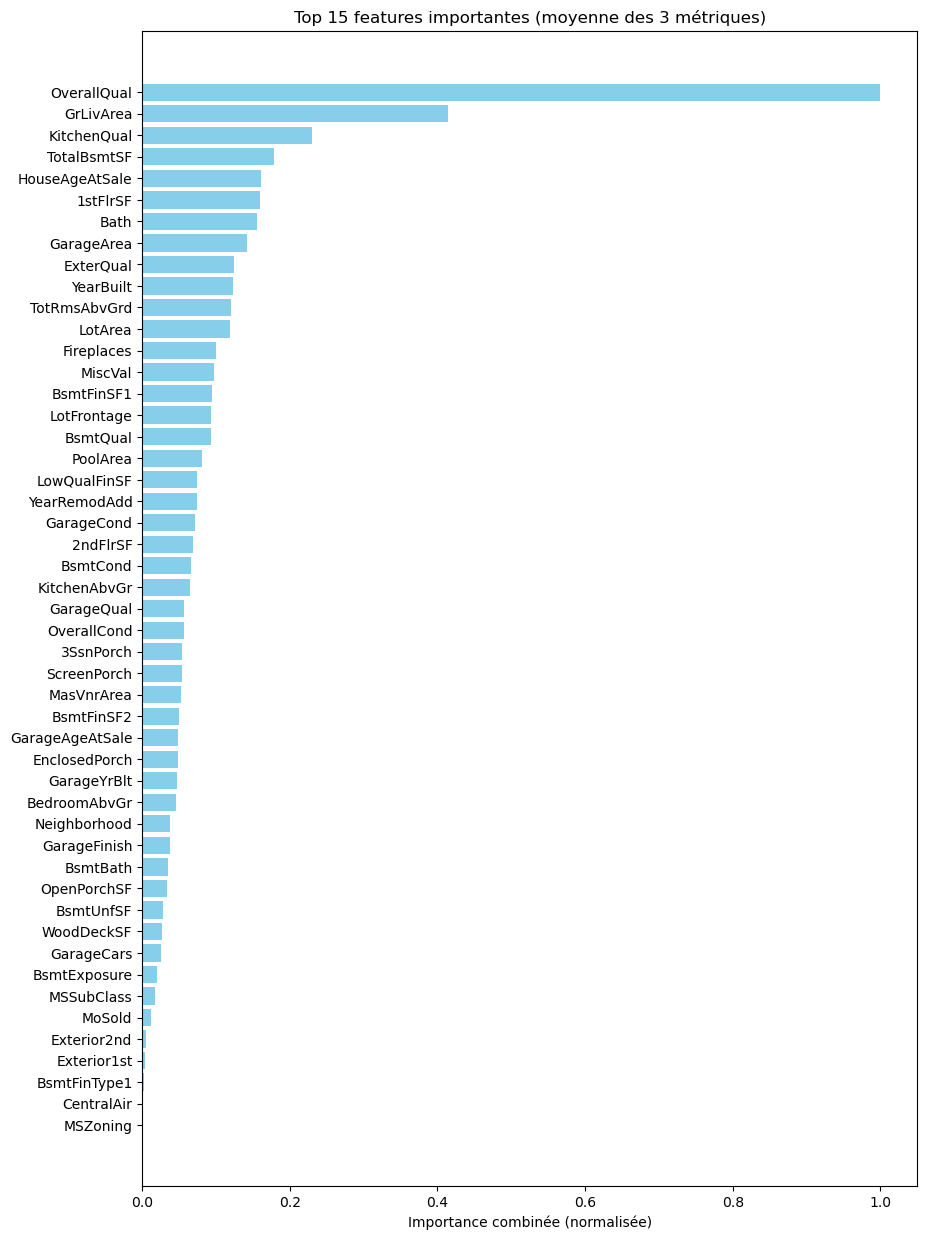

In [150]:
import matplotlib.pyplot as plt

top_features = df_importances.head(15)

plt.figure(figsize=(10,15))
plt.barh(df_importances["Feature"].astype(str), df_importances["Combined"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance combinée (normalisée)")
plt.title("Top 15 features importantes (moyenne des 3 métriques)")
plt.show()


In [151]:
# full_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="SalePrice", task=tfdf.keras.Task.REGRESSION)
# final_model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# final_model.fit(full_ds)

In [159]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = meta_model.predict(stack_test)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.expm1(x))
sample_submission_df.to_csv('../submissions/submission16_RF+XGB.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,118140.619280
1,1462,148964.934058
2,1463,178501.341581
3,1464,184439.881609
4,1465,192444.506275


In [ ]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission11_retrain_model_on_full_DS.csv -m "11th try: retrain model on full DS "